# LAB 03.01 - Model Generation

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()
init.endpoint

replicating local resources


'https://m5knaekxo6.execute-api.us-west-2.amazonaws.com/dev-v0001/rlxmooc'

In [4]:
from local.lib.rlxmoocapi import submit, session
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L03.01", varname="student");

logging in as juanj.acevedo@udea.edu.co... please wait
using course session ai4eng.v1::open
success!! you are logged in


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from local.lib import mlutils
from IPython.display import Image
%matplotlib inline

## A machine learning task

We have two species of bugs (**X bugs** and **Z bugs**), for each bug we have measured its **width** and **length**. Once we have a bug, determining if is of  **species X** or **species Z** is very costly (lab analysis, etc.)

**Machine learning goal**: We want to create a model so that, when given the width and length of a bug, will tell us whether it belongs to  **species X** or **species Z**. If the model performs well, we might use it insted of the lab analysis.

**To train a machine learning model** we built a **training dataset** where we have **annotated** 20 bugs with their **confirmed** species. The training dataset has:

- 20 data items
- two data columns (**width** and **length**)
- one label column, with two unique values: **0 for species X**, and **1 for species Z**.


In [5]:

d = pd.read_csv("local/data/trilotropicos_small.csv")
X,y = d.values[:,:2], d.values[:,-1]
print (d.shape, X.shape, y.shape)
print (X[:5])
print (y[:5])
d.head()


(20, 3) (20, 2) (20,)
[[0.5  0.65]
 [0.75 0.34]
 [0.37 0.5 ]
 [0.57 0.74]
 [1.   0.69]]
[0. 1. 1. 0. 1.]


,width,height,y
0,0.50,0.65,0.0
1,0.75,0.34,1.0
2,0.37,0.50,1.0
3,0.57,0.74,0.0
4,1.00,0.69,1.0


Since it is just two columns, we can visualize it

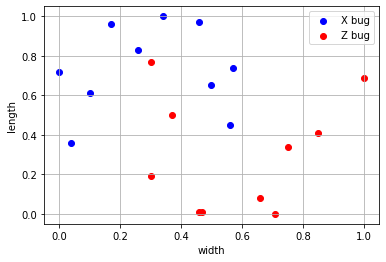

In [6]:

plt.scatter(X[y==0][:,0], X[y==0][:,1], color="blue", label="X bug")
plt.scatter(X[y==1][:,0], X[y==1][:,1], color="red", label="Z bug")
plt.xlabel("width");plt.ylabel("length"); plt.legend(); plt.grid();


## Task 1. Manually use a predictive model

We give you a procedure somewhat calibrated so that, given a new bug, it produces a prediction. The procedure depends on two parameters $\theta_0$ and $\theta_1$. Given the width $w^{(i)}$ and height $h^{(i)}$ of bug number $i$, the prediction $\hat{y}^{(i)} \in \{0, 1\}$ is computed as follows:

$$\hat{y}^{(i)} = 0\text{ if }w^{(i)}<\theta_0\text{ AND }h^{(i)}>\theta_1;\;\;\;\;\;\text{otherwise }\hat{y}^{(i)}=1$$


This can be considered as a **model template**, depending on two parameters.


Complete **the following function** so that whenever given a `numpy` array `X` $\in \mathbb{R}^m \times \mathbb{R}^2$ containing the width and height of $m$ bugs, returns a vector $\in \mathbb{R}^m$ with the predictions of the $m$ bugs as described in the expression above. The parameter `t` $\in \mathbb{R}^2$ contains, in this order, $\theta_0$ and $\theta_1$

Observe that your function must return a `numpy` vector of **integers** (not booleans). 

**CHALLENGE**: solve it with one single line of code

**HINT**: use `.astype(int)` to convert a `numpy` array of booleans to integers.

In [7]:
def predict(X, t):
    r = np.zeros (len(X))
    for i in range (0,len(X)):
      a=1
      if (X[i,0]<t[0]) and (X[i,1]>t[1]):
          a=0
      r[i]=a
    return r.astype(int)

check manually your code, your predictions with the following `t` must be 

       [1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0]
       
with an accuracy of 0.75

In [8]:
t = np.r_[.5,.3]
y_hat = predict(X, t)
y_hat

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0])

In [9]:
np.mean(y==y_hat)

0.75

observe the classification boundary that the model generates

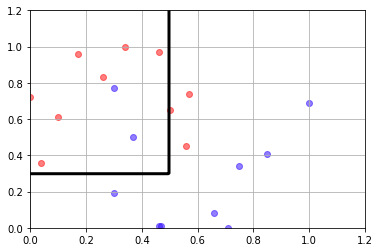

In [10]:
mlutils.plot_2Ddata_with_boundary(lambda X: predict(X,t), X, y); plt.grid();

and with other `t` ... which is better?

0.7

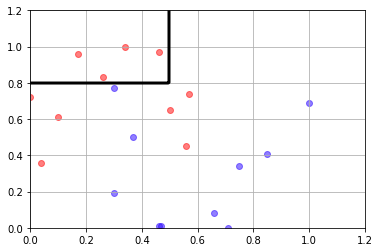

In [11]:
t = np.r_[.5,.8]
mlutils.plot_2Ddata_with_boundary(lambda X: predict(X,t), X, y); plt.grid();
np.mean(y==predict(X,t))

observe the prediction boundaries of other models. Change the `max_depth` of the decision tree to 2. Does it look familiar?

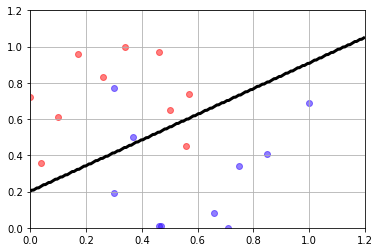

In [12]:
from sklearn.linear_model import LogisticRegression
mlutils.plot_2Ddata_with_boundary(LogisticRegression().fit(X,y).predict, X, y); plt.grid();

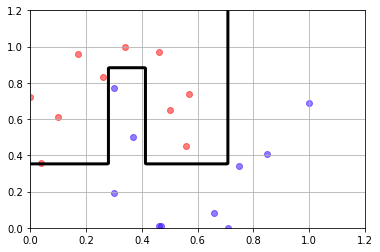

In [13]:
from sklearn.tree import DecisionTreeClassifier
mlutils.plot_2Ddata_with_boundary(DecisionTreeClassifier(max_depth=5).fit(X,y).predict, X, y); plt.grid();

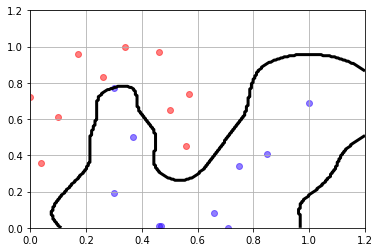

In [14]:
from sklearn.svm import SVC
mlutils.plot_2Ddata_with_boundary(SVC(gamma=50).fit(X,y).predict, X, y); plt.grid();

**submit your answer**

In [15]:
student.submit_task(globals(), task_id="task_01");

## Task 2. Fit the model

Given a set of annotated data $X$, $y$ and the **model template** of the previous exercise, complete the following function that returns $\theta_0$ and $\theta_1$ that produce the **best accuracy** on the given `X` and `y`. Consider only $\theta_0$ and $\theta_1$ with **one decimal number between 0 and 1**.

**Hint**: use a brute force approach, consider all combinations of $\theta_0$ and $\theta_1 \in$ [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]. Use [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) and [`itertools.product`](https://docs.python.org/3/library/itertools.html#itertools.product)

Your function must return an `numpy` array with two elements, the resulting $\theta_0$ and $\theta_1$

In [16]:
import itertools
def fit(X,y):
  if X.shape[1]!=2:
    raise ValueError("this model only works with two features")
  def predict(X, t):
    return 1-((X[:,0]<t[0])&(X[:,1]>t[1])).astype(int)
  tr = np.linspace(0,1,11)
  r = {(t0,t1): np.mean(predict(X,[t0,t1])==y) for t0,t1 in itertools.product(tr,tr)}
  t = np.r_[list(r.keys())[np.argmax(list(r.values()))]]

  return t

In [17]:
t = fit(X,y)

Check your solution with the code below. The `t` returned by your function should produce an accuracy of 0.9 with the example data `X`, `y`. There might be several `t` producing the same accuracy, you just have to return any of those. 

0.9

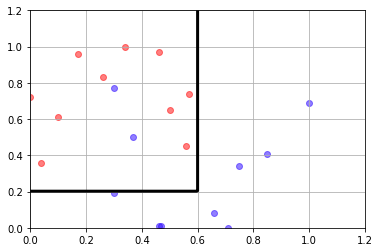

In [18]:
mlutils.plot_2Ddata_with_boundary(lambda X: predict(X,t), X, y); plt.grid();
np.mean(y==predict(X,t))

you can also use your model on different data. Execute the next cells several times to see the effect on different datasets.

In [19]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

bX, by = make_blobs(100,n_features=2, centers=2)
bX = MinMaxScaler(feature_range=(0.1,.9)).fit_transform(bX)

In [20]:
bt = fit(bX, by)

0.93

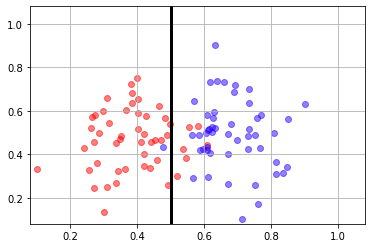

In [21]:
mlutils.plot_2Ddata_with_boundary(lambda X: predict(X,bt), bX, by); plt.grid();
np.mean(by==predict(bX,bt))

**submit your answer**

In [22]:
student.submit_task(globals(), task_id="task_02");

## Task 3: Make an `sklearn` compatible class with your model

organize the previous methods in the following class structure. Bear in mind that:

- the `fit` method now does not return `t`, which is now stored in an instance variable `self.t`
- the `fit` method must now return `self`.
- the `predict` method now does not accept `t` as argument, it must use the one stored in `self.t`

In [23]:
def SimpleModel():
    class _SimpleModel:

        def _init_(self):
            pass

        def fit(self, X, y):

            if X.shape[1]!=2:
              raise ValueError("this model only works with two features")
            def predict(X, t):
              return 1-((X[:,0]<t[0])&(X[:,1]>t[1])).astype(int)

            tr = np.linspace(0,1,11)
            r = {(t0,t1): np.mean(predict(X,[t0,t1])==y) for t0,t1 in itertools.product(tr, tr)}
            self.t = np.r_[list(r.keys())[np.argmax(list(r.values()))]]
            return self

        def predict(self, X):
            return 1-((X[:,0]<self.t[0])&(X[:,1]>self.t[1])).astype(int)
        
    return _SimpleModel()

In [24]:
m = SimpleModel()
m.fit(X,y)
m.predict(X)

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0])

0.9

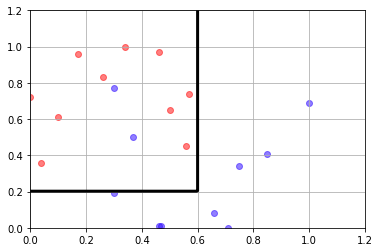

In [25]:
mlutils.plot_2Ddata_with_boundary(m.predict, X, y); plt.grid();
np.mean(y==m.predict(X))

check your model with different parametrizations of the `moons` dataset (more and less data points, more and less noise)

0.84

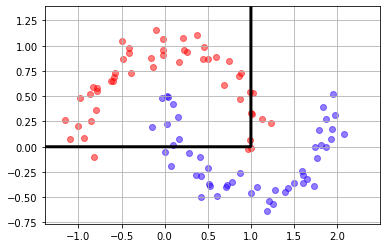

In [26]:
from sklearn.datasets import make_moons

mX, my = make_moons(100, noise=.1)
m = SimpleModel()
m.fit(mX,my)

mlutils.plot_2Ddata_with_boundary(m.predict, mX, my); plt.grid();
np.mean(my==m.predict(mX))

**submit your answer**

In [27]:
student.submit_task(globals(), task_id="task_03");